# Compare Simulated Read pairs

## Simulation Paramters:

### Nucleotide substitution frequences
**f1**: equal frequencies, i.e. freq(A) = freq(C) = freq(G) = freq(T) = 0.25,
**f2**: GC-rich, i.e. freq(A) = 0.1, freq(C) = 0.3, freq(G) = 0.4, freq(T) = 0.2,
**f3**: AT-rich, i.e. freq(A) = freq(T) = 0.4, freq(C) = freq(G) = 0.1.

### Evolutionary model
model parameters
  - **nogam**: GTR (six relative rates of nucleotide substitution)
  - **gamma**: GTR+Γ (six rates and one Γ shape parameter)

### distances
0.05 --> 1.0 (stepping by 0.05)
sim_distances = range_with_floats_list(0.05, 1.00, 0.05)

## Zenodo Ref

https://zenodo.org/record/4034462


In [1]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [3]:
dna_csvs = glob.glob("../simread_comparisons/*dnainput.compare.csv.gz")
#test_csvs = ["data-d0.05-f1-gamma.compare.csv.gz"]
protein_csvs = glob.glob("../simread_comparisons/*prodigal.compare.csv.gz")

In [4]:
compareDF = pd.concat([pd.read_csv(csv, sep=",", compression="gzip").assign(fileinfo=os.path.basename(csv).rsplit(".compare.csv.gz")[0]) for csv in dna_csvs])
proteinDF = pd.concat([pd.read_csv(csv, sep=",", compression="gzip").assign(fileinfo=os.path.basename(csv).rsplit(".compare.csv.gz")[0]) for csv in protein_csvs])

In [5]:
compareDF#["p-distance"]

,seed,freq(T),freq(C),freq(A),freq(G),rate(C-T),rate(A-T),rate(G-T),rate(A-C),rate(C-G),...,hp-k37-scaled100.containment-pdist,hp-k39-scaled100.jaccard,hp-k39-scaled100.jaccard-pdist,hp-k39-scaled100.containment,hp-k39-scaled100.containment-pdist,hp-k42-scaled100.jaccard,hp-k42-scaled100.jaccard-pdist,hp-k42-scaled100.containment,hp-k42-scaled100.containment-pdist,fileinfo
0,401,0.40,0.10,0.40,0.10,2.00743,0.615599,0.246909,0.598580,0.306629,...,0.040922,0.055884,0.055956,0.107177,0.041227,0.047071,0.055742,0.090918,0.041762,data-d0.05-f3-gamma.dnainput
1,402,0.40,0.10,0.40,0.10,1.35762,0.127302,0.193659,0.212067,0.147882,...,0.030843,0.090267,0.045062,0.168134,0.031425,0.077888,0.045011,0.146907,0.031906,data-d0.05-f3-gamma.dnainput
2,403,0.40,0.10,0.40,0.10,1.38297,0.228854,0.235608,0.332592,0.532473,...,0.035927,0.069482,0.050981,0.131757,0.036680,0.059377,0.050770,0.113455,0.037165,data-d0.05-f3-gamma.dnainput
3,404,0.40,0.10,0.40,0.10,1.50213,0.232770,0.234467,0.372922,0.436632,...,0.036141,0.071179,0.050432,0.133833,0.036339,0.061405,0.050054,0.116096,0.036692,data-d0.05-f3-gamma.dnainput
4,405,0.40,0.10,0.40,0.10,1.32803,0.247296,0.214534,0.438519,1.144030,...,0.037936,0.065322,0.052387,0.123328,0.038127,0.056145,0.051965,0.106624,0.038447,data-d0.05-f3-gamma.dnainput
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.25,0.25,0.25,0.25,2.12115,0.433461,0.390442,0.429627,0.418261,...,0.103944,0.003067,0.122512,0.006253,0.106410,0.002455,0.118948,0.005004,0.103938,data-d0.15-f1-gamma.dnainput
196,197,0.25,0.25,0.25,0.25,1.37466,0.326142,0.317280,0.522544,0.966229,...,0.106780,0.002939,0.123466,0.006010,0.107312,0.001941,0.123858,0.003954,0.108930,data-d0.15-f1-gamma.dnainput
197,198,0.25,0.25,0.25,0.25,1.55224,0.333574,0.331005,0.495819,0.897968,...,0.107531,0.003040,0.122711,0.006084,0.107033,0.002108,0.122137,0.004212,0.107592,data-d0.15-f1-gamma.dnainput
198,199,0.25,0.25,0.25,0.25,1.90767,0.617605,0.187626,0.495055,0.506380,...,0.108773,0.002641,0.125856,0.005270,0.110296,0.001741,0.126120,0.003484,0.111599,data-d0.15-f1-gamma.dnainput


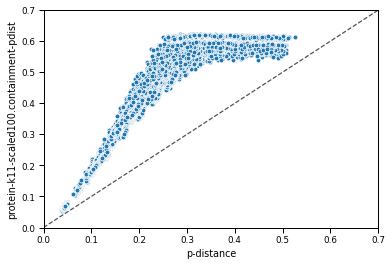

In [6]:
g=sns.scatterplot(data=compareDF, x="p-distance", y="protein-k11-scaled100.containment-pdist",palette="GnBu_d")
g.set(ylim=(0, 0.7))
g.set(xlim=(0, 0.7))
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.


In [7]:
compareDF.columns
#non_dist_cols = ['seed', 'freq(T)', 'freq(C)', 'freq(A)', 'freq(G)', 'rate(C-T)','rate(A-T)', 'rate(G-T)', 'rate(A-C)', 'rate(C-G)', 'alpha', 'lgt1','lgt2', 'sites', 'core', 'name', 'fileinfo']
pdist_columns = [x for x in compareDF.columns if "pdist" in x]
pdist_columns

['nucleotide-k21-scaled1000.jaccard-pdist',
 'nucleotide-k21-scaled1000.containment-pdist',
 'nucleotide-k31-scaled1000.jaccard-pdist',
 'nucleotide-k31-scaled1000.containment-pdist',
 'nucleotide-k51-scaled1000.jaccard-pdist',
 'nucleotide-k51-scaled1000.containment-pdist',
 'protein-k7-scaled100.jaccard-pdist',
 'protein-k7-scaled100.containment-pdist',
 'protein-k8-scaled100.jaccard-pdist',
 'protein-k8-scaled100.containment-pdist',
 'protein-k9-scaled100.jaccard-pdist',
 'protein-k9-scaled100.containment-pdist',
 'protein-k10-scaled100.jaccard-pdist',
 'protein-k10-scaled100.containment-pdist',
 'protein-k11-scaled100.jaccard-pdist',
 'protein-k11-scaled100.containment-pdist',
 'protein-k12-scaled100.jaccard-pdist',
 'protein-k12-scaled100.containment-pdist',
 'dayhoff-k15-scaled100.jaccard-pdist',
 'dayhoff-k15-scaled100.containment-pdist',
 'dayhoff-k16-scaled100.jaccard-pdist',
 'dayhoff-k16-scaled100.containment-pdist',
 'dayhoff-k17-scaled100.jaccard-pdist',
 'dayhoff-k17-scal

In [8]:
meltedCompare = pd.melt(compareDF, id_vars=["name", "p-distance"], value_vars=pdist_columns, var_name='comparison_type', value_name='estimated p-distance')

In [9]:
meltedCompare

,name,p-distance,comparison_type,estimated p-distance
0,data-d0.05-f3-gamma-seed401,0.043100,nucleotide-k21-scaled1000.jaccard-pdist,0.049144
1,data-d0.05-f3-gamma-seed402,0.037653,nucleotide-k21-scaled1000.jaccard-pdist,0.041895
2,data-d0.05-f3-gamma-seed403,0.041617,nucleotide-k21-scaled1000.jaccard-pdist,0.046106
3,data-d0.05-f3-gamma-seed404,0.041302,nucleotide-k21-scaled1000.jaccard-pdist,0.047352
4,data-d0.05-f3-gamma-seed405,0.043352,nucleotide-k21-scaled1000.jaccard-pdist,0.049552
...,...,...,...,...
866395,data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938
866396,data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930
866397,data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592
866398,data-d0.15-f1-gamma-seed199,0.107828,hp-k42-scaled100.containment-pdist,0.111599


In [10]:
meltedCompare["alphabet"] = meltedCompare["comparison_type"].str.extract(r"(?P<alphabet>\w*)-k")
meltedCompare["ksize"] = meltedCompare["comparison_type"].str.extract(r"-k(?P<ksize>\d*)")
meltedCompare["nt_freq"] = meltedCompare["name"].str.extract(r"-(?P<nt_freq>f\d*)-")
meltedCompare["model"] = meltedCompare["name"].str.extract(r"(?P<model>\w*)-seed")
meltedCompare["alpha-ksize"] = meltedCompare["alphabet"] + "-" + meltedCompare["ksize"]
meltedCompare["scaled"] = meltedCompare["comparison_type"].str.extract(r"-scaled(?P<scaled>\d*)")
meltedCompare["estimator"] = meltedCompare["comparison_type"].str.extract(r".(?P<alphabet>\w*)-pdist")

In [11]:
meltedCompare = meltedCompare.loc[meltedCompare["estimated p-distance"] < 1.0 ]

In [12]:
meltedCompare["PC_pdist"] = -np.log(1 - meltedCompare["estimated p-distance"])
meltedCompare["true ANI"] = 1- meltedCompare["p-distance"] 
meltedCompare["estimated ANI"] = 1- meltedCompare["PC_pdist"] 

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [13]:
meltedCompare.set_index("name")

,p-distance,comparison_type,estimated p-distance,alphabet,ksize,nt_freq,model,alpha-ksize,scaled,estimator,PC_pdist,true ANI,estimated ANI
name,,,,,,,,,,,,,
data-d0.05-f3-gamma-seed401,0.043100,nucleotide-k21-scaled1000.jaccard-pdist,0.049144,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.050392,0.956900,0.949608
data-d0.05-f3-gamma-seed402,0.037653,nucleotide-k21-scaled1000.jaccard-pdist,0.041895,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.042798,0.962347,0.957202
data-d0.05-f3-gamma-seed403,0.041617,nucleotide-k21-scaled1000.jaccard-pdist,0.046106,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.047202,0.958383,0.952798
data-d0.05-f3-gamma-seed404,0.041302,nucleotide-k21-scaled1000.jaccard-pdist,0.047352,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.048509,0.958698,0.951491
data-d0.05-f3-gamma-seed405,0.043352,nucleotide-k21-scaled1000.jaccard-pdist,0.049552,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.050821,0.956648,0.949179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938,hp,42,f1,gamma,hp-42,100,containment,0.109746,0.897518,0.890254
data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930,hp,42,f1,gamma,hp-42,100,containment,0.115332,0.890585,0.884668
data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592,hp,42,f1,gamma,hp-42,100,containment,0.113832,0.891040,0.886168


In [14]:
nucl_only = meltedCompare[meltedCompare["alphabet"] == "nucleotide"]
nucl_only["ksize"].unique()

array(['21', '31', '51'], dtype=object)

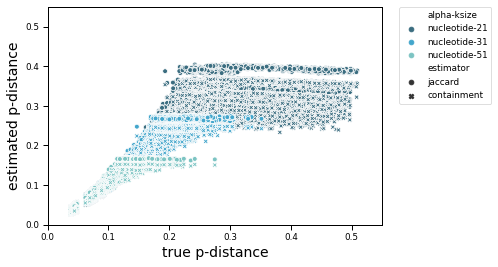

In [15]:
g=sns.scatterplot(data=nucl_only, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))
fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

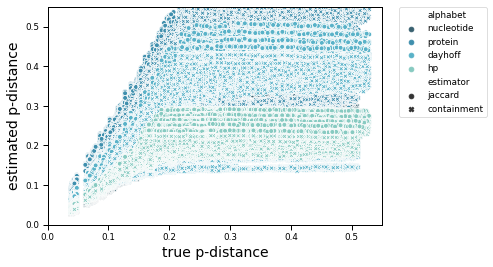

In [16]:
g=sns.scatterplot(data=meltedCompare, x="p-distance", y='estimated p-distance', hue="alphabet", palette="GnBu_d", style = "estimator")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

fig = g.get_figure()
#fig.savefig("estimated p-distance.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [17]:
jaccard_only = meltedCompare[meltedCompare["estimator"] == "jaccard"]
nucl_jaccard = jaccard_only[jaccard_only["alphabet"] == "nucleotide"]
contain_only = meltedCompare[meltedCompare["estimator"] == "containment"]
nucl_contain = contain_only[contain_only["alphabet"] == "nucleotide"]



[(0.0, 0.55), (0.0, 0.55)]

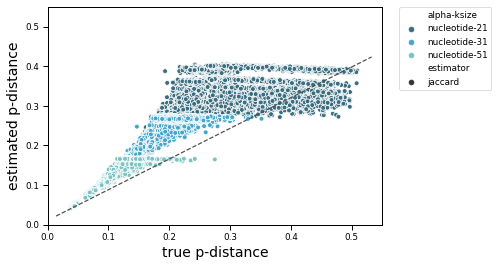

In [18]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

#fig = g.get_figure()


### to do?:
put some transpancy or plotting on separate plots next to each other

In [19]:
k21 = meltedCompare.loc[meltedCompare["ksize"] == "21"]


[(0.0, 0.55), (0.0, 0.55)]

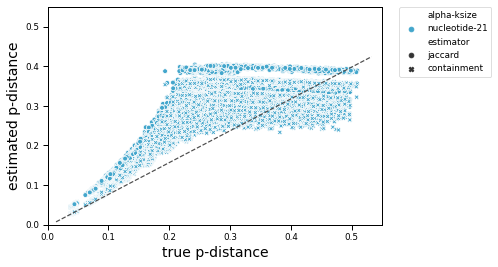

In [20]:
g=sns.scatterplot(data=k21, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator")#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))


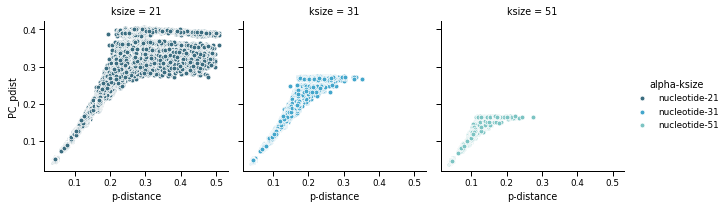

In [21]:
g = sns.FacetGrid(data=nucl_jaccard, col="ksize", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "p-distance", 'PC_pdist')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()
#lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.xlabel("true p-distance", size=14)
#plt.ylabel("estimated p-distance", size=14)
#g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))


[(0.0, 0.55), (0.0, 0.55)]

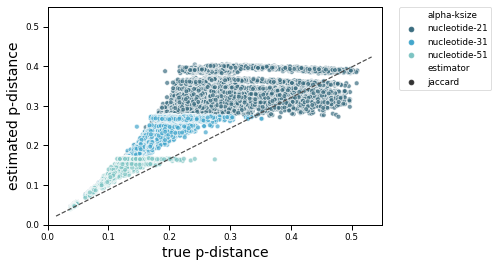

In [22]:
g=sns.scatterplot(data=nucl_jaccard, x="p-distance", y='PC_pdist', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.55))

#fig = g.get_figure()


In [23]:
meltedCompare["true ANI"] = 1- meltedCompare["p-distance"] 
meltedCompare["estimated ANI"] = 1- meltedCompare["PC_pdist"] 

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
meltedCompare

,name,p-distance,comparison_type,estimated p-distance,alphabet,ksize,nt_freq,model,alpha-ksize,scaled,estimator,PC_pdist,true ANI,estimated ANI
0,data-d0.05-f3-gamma-seed401,0.043100,nucleotide-k21-scaled1000.jaccard-pdist,0.049144,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.050392,0.956900,0.949608
1,data-d0.05-f3-gamma-seed402,0.037653,nucleotide-k21-scaled1000.jaccard-pdist,0.041895,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.042798,0.962347,0.957202
2,data-d0.05-f3-gamma-seed403,0.041617,nucleotide-k21-scaled1000.jaccard-pdist,0.046106,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.047202,0.958383,0.952798
3,data-d0.05-f3-gamma-seed404,0.041302,nucleotide-k21-scaled1000.jaccard-pdist,0.047352,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.048509,0.958698,0.951491
4,data-d0.05-f3-gamma-seed405,0.043352,nucleotide-k21-scaled1000.jaccard-pdist,0.049552,nucleotide,21,f3,gamma,nucleotide-21,1000,jaccard,0.050821,0.956648,0.949179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866395,data-d0.15-f1-gamma-seed196,0.102482,hp-k42-scaled100.containment-pdist,0.103938,hp,42,f1,gamma,hp-42,100,containment,0.109746,0.897518,0.890254
866396,data-d0.15-f1-gamma-seed197,0.109415,hp-k42-scaled100.containment-pdist,0.108930,hp,42,f1,gamma,hp-42,100,containment,0.115332,0.890585,0.884668
866397,data-d0.15-f1-gamma-seed198,0.108960,hp-k42-scaled100.containment-pdist,0.107592,hp,42,f1,gamma,hp-42,100,containment,0.113832,0.891040,0.886168
866398,data-d0.15-f1-gamma-seed199,0.107828,hp-k42-scaled100.containment-pdist,0.111599,hp,42,f1,gamma,hp-42,100,containment,0.118332,0.892172,0.881668


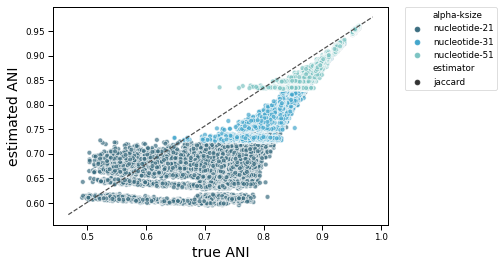

In [25]:
g=sns.scatterplot(data=nucl_jaccard, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

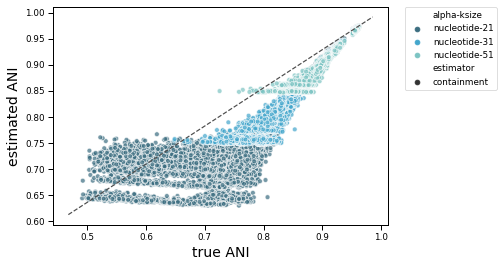

In [26]:
g=sns.scatterplot(data=nucl_contain, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

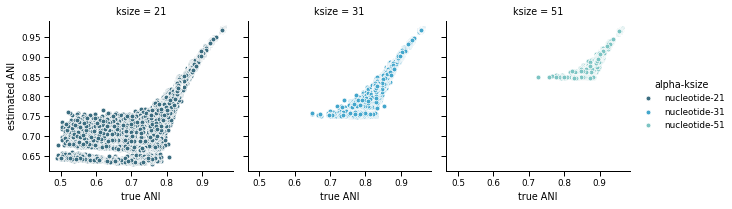

In [27]:
g = sns.FacetGrid(data=nucl_contain, col="ksize", hue="alpha-ksize",  palette="GnBu_d")
g.map(sns.scatterplot, "true ANI", 'estimated ANI')#, style = "estimator")#, hue="alpha-ksize", palette="GnBu_d", style = "estimator"))#, )
g.add_legend()

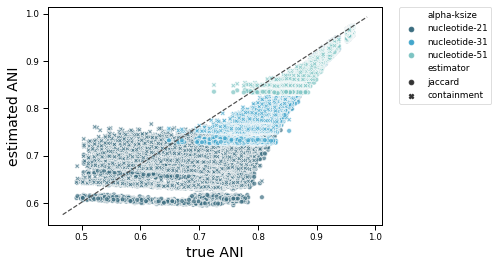

In [28]:
g=sns.scatterplot(data=nucl_only, x="true ANI", y='estimated ANI', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#sns.lineplot(data=nucl_jaccard, x="p-distance", y="p-distance")
plt.xlabel("true ANI", size=14)
plt.ylabel("estimated ANI", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))

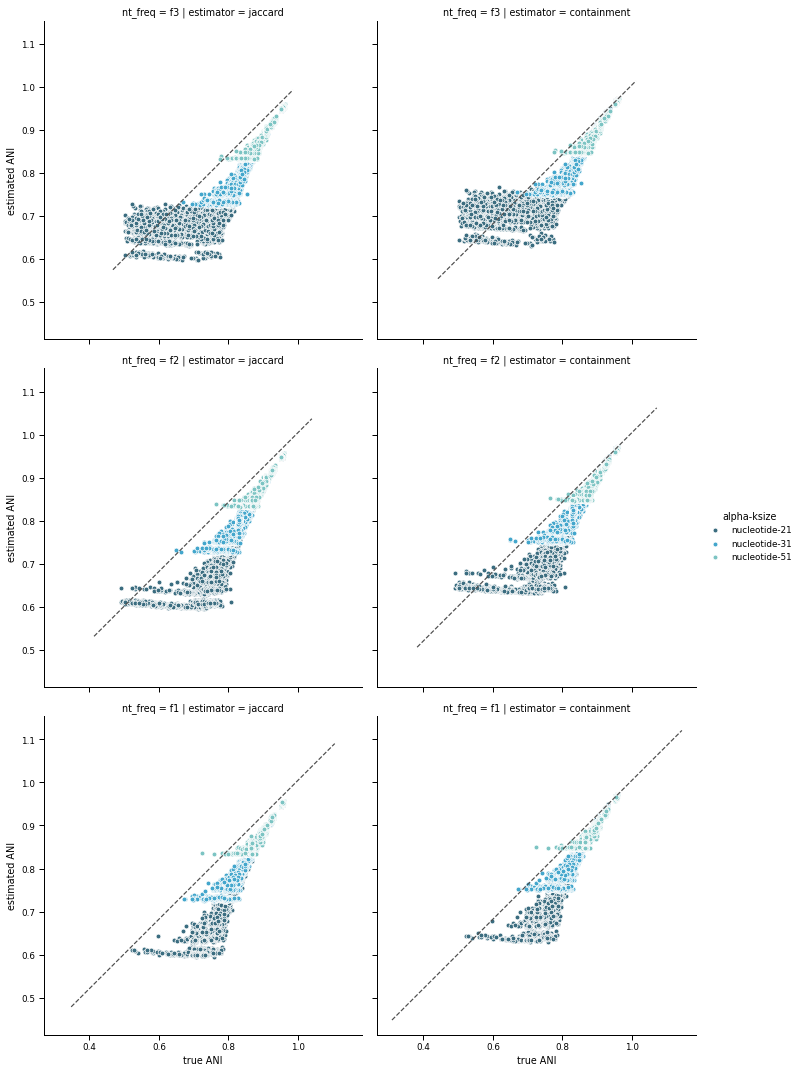

In [29]:
g = sns.FacetGrid(data=nucl_only, col="estimator", row="nt_freq", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()

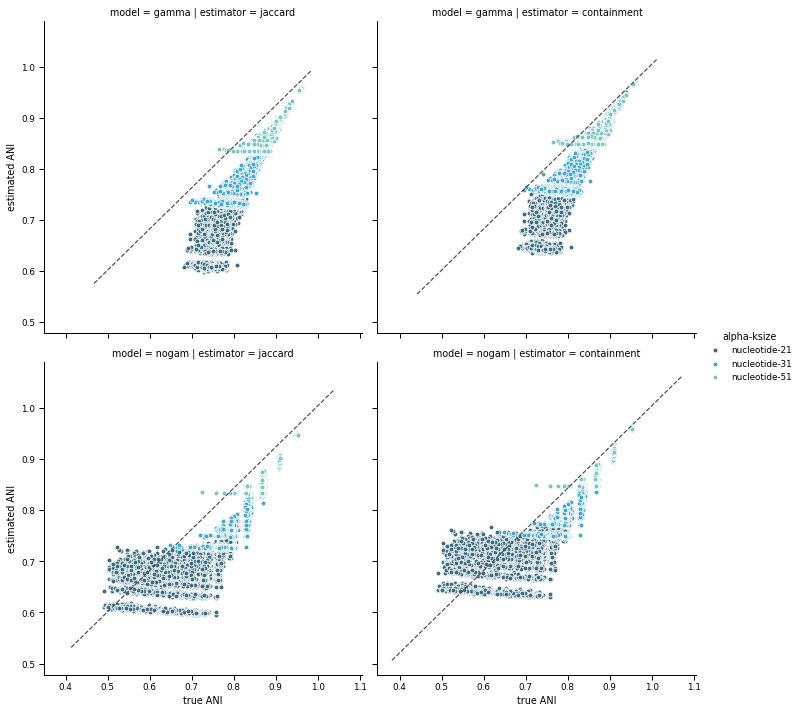

In [30]:
g = sns.FacetGrid(data=nucl_only, col="estimator", row="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "true ANI", 'estimated ANI')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()

# Prodigal --> Protein Comparisons

In [31]:
proteinDF

,seed,freq(T),freq(C),freq(A),freq(G),rate(C-T),rate(A-T),rate(G-T),rate(A-C),rate(C-G),...,hp-k37-scaled100.containment-pdist,hp-k39-scaled100.jaccard,hp-k39-scaled100.jaccard-pdist,hp-k39-scaled100.containment,hp-k39-scaled100.containment-pdist,hp-k42-scaled100.jaccard,hp-k42-scaled100.jaccard-pdist,hp-k42-scaled100.containment,hp-k42-scaled100.containment-pdist,fileinfo
0,1,0.25,0.25,0.25,0.25,1.93635,0.262837,0.291035,0.586683,0.244816,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.65-f1-nogam.prodigal
1,2,0.25,0.25,0.25,0.25,2.37147,0.693275,0.144888,0.496176,0.344651,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.65-f1-nogam.prodigal
2,3,0.25,0.25,0.25,0.25,1.58037,0.340743,0.287048,0.508184,0.792160,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.65-f1-nogam.prodigal
3,4,0.25,0.25,0.25,0.25,2.00743,0.615599,0.246909,0.598580,0.306629,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.65-f1-nogam.prodigal
4,5,0.25,0.25,0.25,0.25,1.38297,0.228854,0.235608,0.332592,0.532473,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,data-d0.65-f1-nogam.prodigal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,396,0.20,0.30,0.10,0.40,1.72613,0.305606,0.255530,0.391901,0.286893,...,0.187038,0.000237,0.178194,0.000482,0.163120,0.000061,0.192998,0.000124,0.179359,data-d0.30-f2-gamma.prodigal
196,397,0.20,0.30,0.10,0.40,2.20515,0.183366,0.156466,0.525413,0.277330,...,0.160759,0.000161,0.186360,0.000339,0.170641,0.000330,0.160027,0.000694,0.145019,data-d0.30-f2-gamma.prodigal
197,398,0.20,0.30,0.10,0.40,2.36705,0.263347,0.110166,0.634021,0.269316,...,0.164743,0.000376,0.168428,0.000761,0.153270,0.000056,0.194756,0.000113,0.181135,data-d0.30-f2-gamma.prodigal
198,399,0.20,0.30,0.10,0.40,1.73278,0.313713,0.271502,0.511385,0.653053,...,0.172963,0.000168,0.185418,0.000341,0.170504,0.000119,0.180204,0.000239,0.166479,data-d0.30-f2-gamma.prodigal


In [32]:
proteinDF.columns
prot_pdist_columns = [x for x in proteinDF.columns if "pdist" in x]
prot_pdist_columns

['nucleotide-k21-scaled1000.jaccard-pdist',
 'nucleotide-k21-scaled1000.containment-pdist',
 'nucleotide-k31-scaled1000.jaccard-pdist',
 'nucleotide-k31-scaled1000.containment-pdist',
 'nucleotide-k51-scaled1000.jaccard-pdist',
 'nucleotide-k51-scaled1000.containment-pdist',
 'protein-k7-scaled100.jaccard-pdist',
 'protein-k7-scaled100.containment-pdist',
 'protein-k8-scaled100.jaccard-pdist',
 'protein-k8-scaled100.containment-pdist',
 'protein-k9-scaled100.jaccard-pdist',
 'protein-k9-scaled100.containment-pdist',
 'protein-k10-scaled100.jaccard-pdist',
 'protein-k10-scaled100.containment-pdist',
 'protein-k11-scaled100.jaccard-pdist',
 'protein-k11-scaled100.containment-pdist',
 'protein-k12-scaled100.jaccard-pdist',
 'protein-k12-scaled100.containment-pdist',
 'dayhoff-k15-scaled100.jaccard-pdist',
 'dayhoff-k15-scaled100.containment-pdist',
 'dayhoff-k16-scaled100.jaccard-pdist',
 'dayhoff-k16-scaled100.containment-pdist',
 'dayhoff-k17-scaled100.jaccard-pdist',
 'dayhoff-k17-scal

In [33]:
meltedProtein = pd.melt(proteinDF, id_vars=["name", "p-distance"], value_vars=prot_pdist_columns, var_name='comparison_type', value_name='estimated p-distance')

In [34]:
meltedProtein["alphabet"] = meltedProtein["comparison_type"].str.extract(r"(?P<alphabet>\w*)-k")
meltedProtein["ksize"] = meltedProtein["comparison_type"].str.extract(r"-k(?P<ksize>\d*)")
meltedProtein["nt_freq"] = meltedProtein["name"].str.extract(r"-(?P<nt_freq>f\d*)-")
meltedProtein["model"] = meltedProtein["name"].str.extract(r"(?P<model>\w*)-seed")
meltedProtein["alpha-ksize"] = meltedProtein["alphabet"] + "-" + meltedProtein["ksize"]
meltedProtein["scaled"] = meltedProtein["comparison_type"].str.extract(r"-scaled(?P<scaled>\d*)")
meltedProtein["estimator"] = meltedProtein["comparison_type"].str.extract(r".(?P<alphabet>\w*)-pdist")

In [35]:
meltedProtein = meltedProtein.loc[meltedProtein["estimated p-distance"] < 1.0 ]
meltedProtein["PC_pdist"] = -np.log(1 - meltedProtein["estimated p-distance"])
meltedProtein["true ANI"] = 1- meltedProtein["p-distance"] 
meltedProtein["estimated AAI"] = 1- meltedProtein["PC_pdist"] 

In [36]:
meltedProtein["comparison_type"].unique()

array(['protein-k7-scaled100.jaccard-pdist',
       'protein-k7-scaled100.containment-pdist',
       'protein-k8-scaled100.jaccard-pdist',
       'protein-k8-scaled100.containment-pdist',
       'protein-k9-scaled100.jaccard-pdist',
       'protein-k9-scaled100.containment-pdist',
       'protein-k10-scaled100.jaccard-pdist',
       'protein-k10-scaled100.containment-pdist',
       'protein-k11-scaled100.jaccard-pdist',
       'protein-k11-scaled100.containment-pdist',
       'protein-k12-scaled100.jaccard-pdist',
       'protein-k12-scaled100.containment-pdist',
       'dayhoff-k15-scaled100.jaccard-pdist',
       'dayhoff-k15-scaled100.containment-pdist',
       'dayhoff-k16-scaled100.jaccard-pdist',
       'dayhoff-k16-scaled100.containment-pdist',
       'dayhoff-k17-scaled100.jaccard-pdist',
       'dayhoff-k17-scaled100.containment-pdist',
       'dayhoff-k18-scaled100.jaccard-pdist',
       'dayhoff-k18-scaled100.containment-pdist',
       'dayhoff-k19-scaled100.jaccard-pdist',


In [37]:
meltedProtein

,name,p-distance,comparison_type,estimated p-distance,alphabet,ksize,nt_freq,model,alpha-ksize,scaled,estimator,PC_pdist,true ANI,estimated AAI
136800,data-d0.65-f1-nogam-seed1,0.409146,protein-k7-scaled100.jaccard-pdist,0.630765,protein,7,f1,nogam,protein-7,100,jaccard,0.996321,0.590854,0.003679
136801,data-d0.65-f1-nogam-seed2,0.405855,protein-k7-scaled100.jaccard-pdist,0.630875,protein,7,f1,nogam,protein-7,100,jaccard,0.996621,0.594145,0.003379
136802,data-d0.65-f1-nogam-seed3,0.421714,protein-k7-scaled100.jaccard-pdist,0.629603,protein,7,f1,nogam,protein-7,100,jaccard,0.993179,0.578286,0.006821
136803,data-d0.65-f1-nogam-seed4,0.413461,protein-k7-scaled100.jaccard-pdist,0.663136,protein,7,f1,nogam,protein-7,100,jaccard,1.088076,0.586539,-0.088076
136804,data-d0.65-f1-nogam-seed5,0.418206,protein-k7-scaled100.jaccard-pdist,0.672723,protein,7,f1,nogam,protein-7,100,jaccard,1.116947,0.581794,-0.116947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866395,data-d0.30-f2-gamma-seed396,0.155534,hp-k42-scaled100.containment-pdist,0.179359,hp,42,f2,gamma,hp-42,100,containment,0.197670,0.844466,0.802330
866396,data-d0.30-f2-gamma-seed397,0.141927,hp-k42-scaled100.containment-pdist,0.145019,hp,42,f2,gamma,hp-42,100,containment,0.156676,0.858073,0.843324
866397,data-d0.30-f2-gamma-seed398,0.143800,hp-k42-scaled100.containment-pdist,0.181135,hp,42,f2,gamma,hp-42,100,containment,0.199836,0.856200,0.800164
866398,data-d0.30-f2-gamma-seed399,0.163066,hp-k42-scaled100.containment-pdist,0.166479,hp,42,f2,gamma,hp-42,100,containment,0.182096,0.836934,0.817904


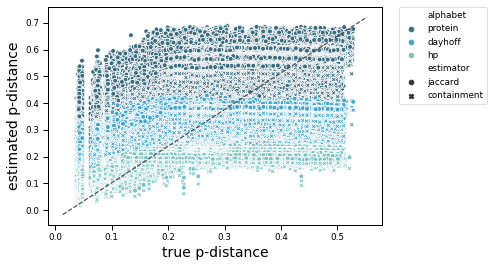

In [38]:
g=sns.scatterplot(data=meltedProtein, x="p-distance", y='estimated p-distance', hue="alphabet", palette="GnBu_d", style = "estimator")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
#g.set(xlim=(0, 0.55), ylim=(0, 0.55))
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.

fig = g.get_figure()

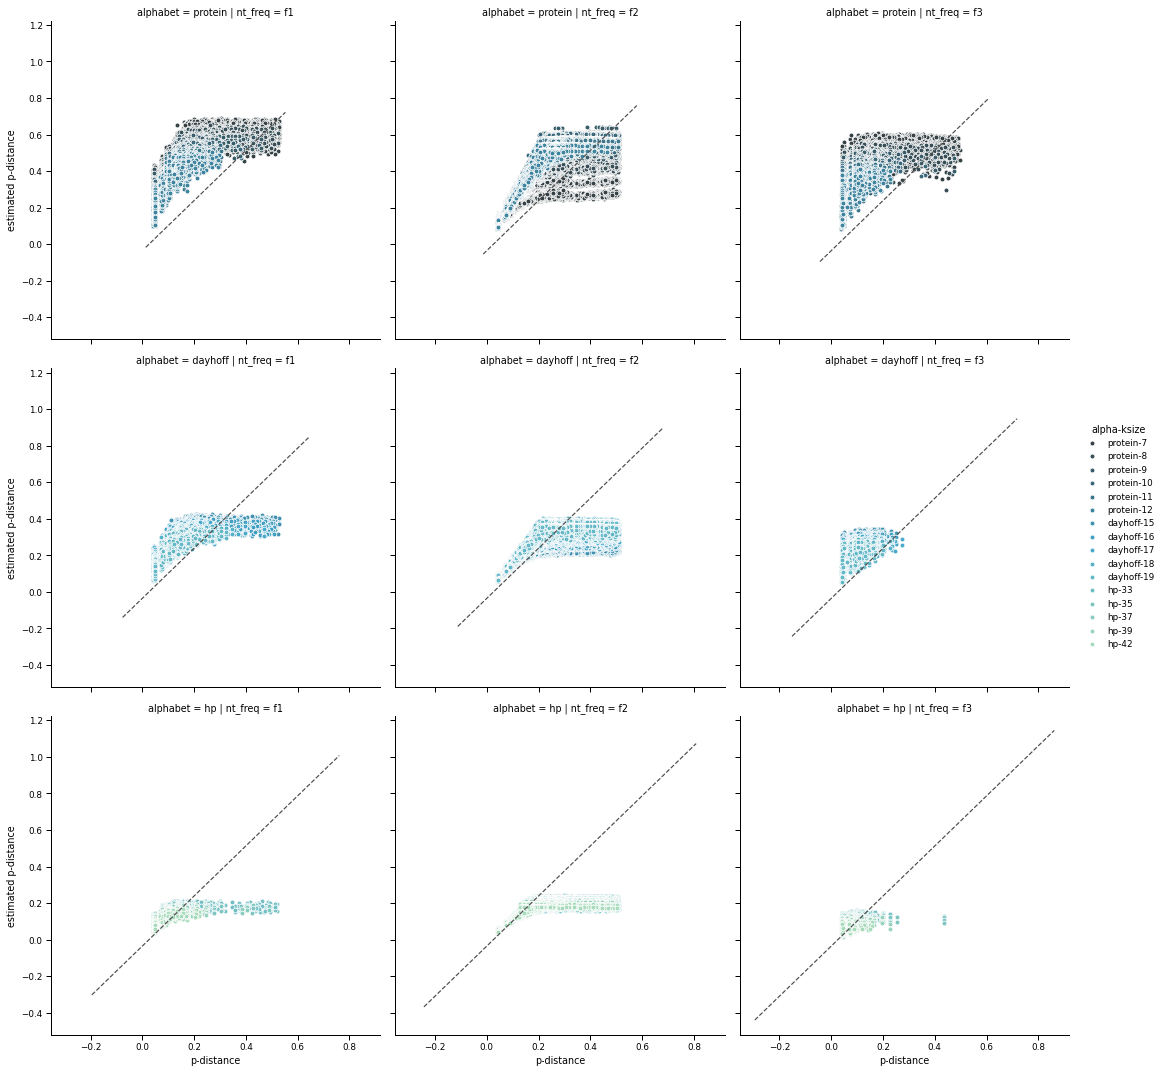

In [39]:
g = sns.FacetGrid(data=meltedProtein, col="nt_freq", row="alphabet", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()

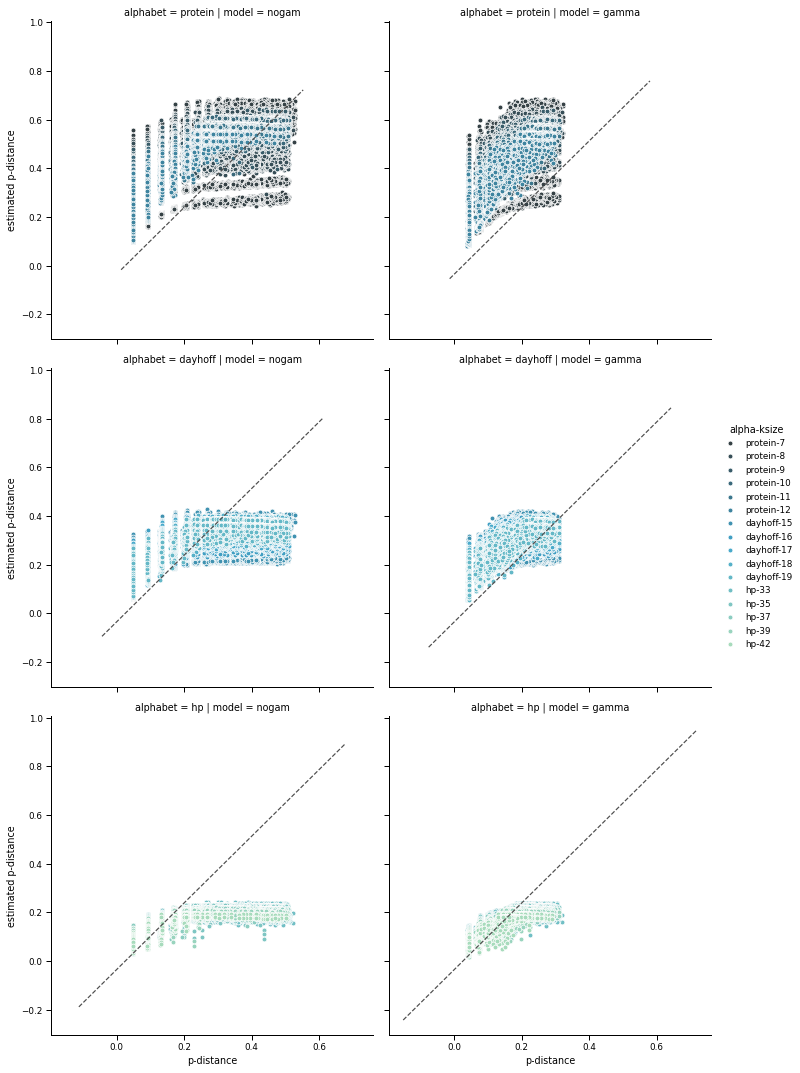

In [40]:
g = sns.FacetGrid(data=meltedProtein, col="model", row="alphabet", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()

[(0.0, 0.6), (0.0, 0.55)]

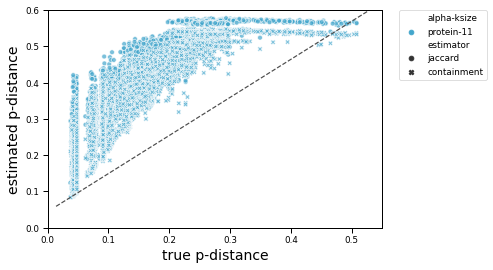

In [41]:
prot11 = meltedProtein[meltedProtein["ksize"] == "11"]
g=sns.scatterplot(data=prot11, x="p-distance", y='estimated p-distance', hue="alpha-ksize", palette="GnBu_d", style = "estimator",  alpha=.7)#, )
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("true p-distance", size=14)
plt.ylabel("estimated p-distance", size=14)
g.plot(g.get_xlim(), g.get_ylim(), ls="--", c=".3") #add 1:1 line.
g.set(xlim=(0, 0.55), ylim=(0, 0.6))

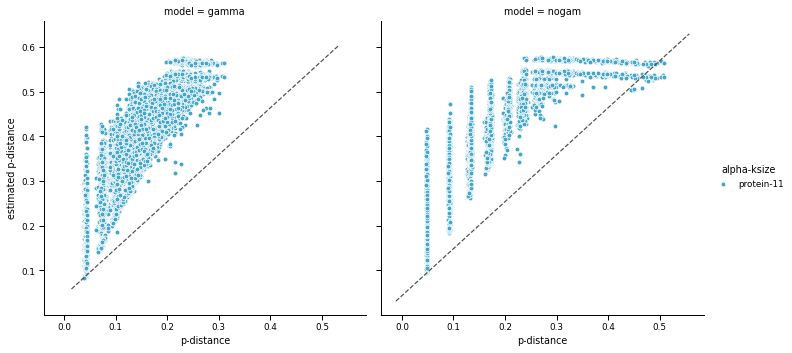

In [42]:
g = sns.FacetGrid(data=prot11, col="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()

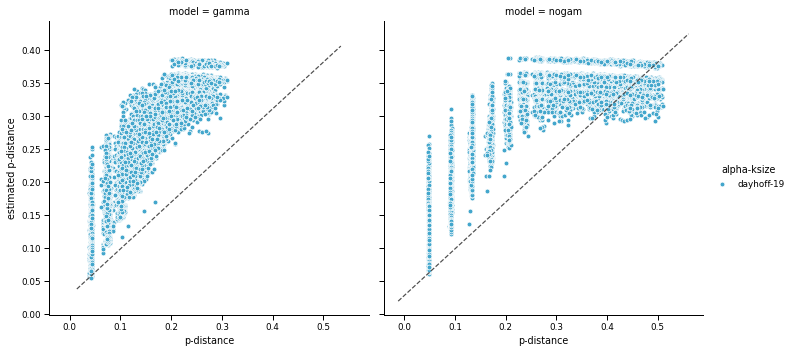

In [43]:
day19 = meltedProtein[meltedProtein["ksize"] == "19"]
g = sns.FacetGrid(data=day19, col="model", hue="alpha-ksize",  palette="GnBu_d", height=5, aspect=1)
g.map(sns.scatterplot, "p-distance", 'estimated p-distance')
for ax in g.fig.axes:
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

g.add_legend()